<a href="https://colab.research.google.com/github/davidkant/mai-demo/blob/master/3_Voyager.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Voyager
A simple example to illustrate the key ideas in George Lewis' piece *Voyager*.

## Setup
Install dependencies and import Python libraries into this notebook session.

In [0]:
# install external libraries
from IPython.display import clear_output
!pip install -q git+https://github.com/davidkant/mai#egg=mai;
!apt-get -qq update
!apt-get -qq install -y libfluidsynth1
clear_output()

In [2]:
# imports
import mai
import random
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display

Using TensorFlow backend.


Define a few functions we'll need.

In [0]:
def waveform_plot(y, title="Interstellar Sax", playback=True):
  """ Plot waveform and playback audio."""

  plt.figure(figsize=(12,3))
  plt.plot(np.arange(len(y))/float(sr), y)
  plt.ylim([-1, 1])
  plt.title(title)
  plt.xlabel('Time (in seconds)')
  plt.ylabel('Amplitude')
  plt.show()

  return IPython.display.Audio(y, rate=sr)

Plot formatting settings.

In [0]:
mai.voyager.PITCH_MIN = 27
mai.voyager.PITCH_MAX = 93
mai.voyager.TIME_MIN = -0.33
mai.voyager.TIME_MAX = 10.33

And **don't forget** to upload `interstellarsax_10.wav` or some audio file!

## Listener & Orchestra
Voyager is structured in two parts: the `listener` and the `orchestra`. 

## Load audiofile
Excerpt of John Coltrane from the 1967 album  *Interstellar Space*.

In [0]:
filename = 'interstellarsax_10.wav'
y, sr = librosa.load(filename, sr=None)

Plot waveform and listen.

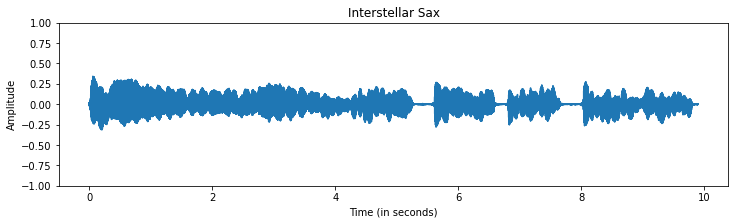

In [6]:
waveform_plot(y, title="Interstellar Sax")

## Listener

Create a new `Voyager` instance and listen.

In [0]:
voyager = mai.voyager.Voyager()

In [0]:
voyager.listen(y) 

**Audio to MIDI transcription**

PLOT


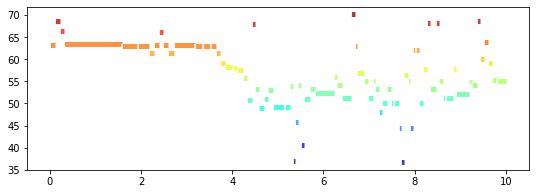

PLAYBACK


In [9]:
print("PLOT")
a = voyager.plot_audio_to_midi()

print("PLAYBACK")
b = voyager.play_audio_to_midi()

**Listener Analysis** 

Analyize raw input data to construct averages of pitch, velocity, probability of note activity and spacing between notes.

LISTENER ANALYSIS
1. Pitch Center: 56.00
2. Pitch Range: 48.00
3. Step Size: 3.47
4. Contour: -0.18
5. Microtonal: 0.16
6. Pulse: 323.00
7. Rhythm: 0.02
8. Num Notes: 77.00

PLOTS


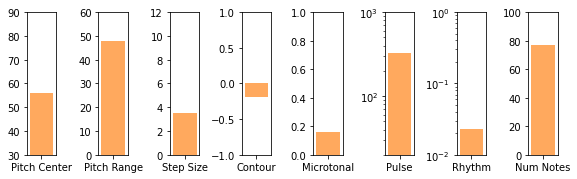

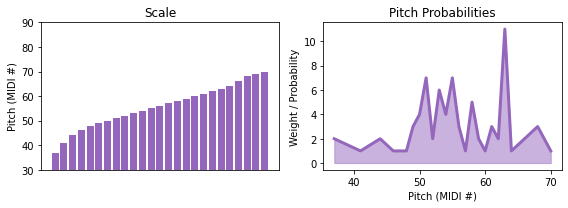

In [10]:
print("LISTENER ANALYSIS")
voyager.print_musical_features()

print("\nPLOTS")
voyager.plot_musical_features()

## Orchestra
A collection of `64` asynchronously operating single-voice MIDI-controlled “players,” each having independent controls for pitch, tempo, rhythm, and other generative music parameters.

In [0]:
orchestra_parameters = {
    'num_players': 3,
    'pitch_center': 60,
    'pitch_range': 12,
    'step_size': 6,
    'step_weight': 1.0,
    'contour': -0.5,
    'microtonal': 0.0,
    'scale': list(range(30, 90)),
    'scale_weight': 0.5,
    'pitch_set': [0, 2, 4, 6, 8, 10],
    'pitch_set_weight': 1.0,
    'pitch_probs': [1 for i in range(30, 90)],
    'pulse': 120,
    'rhythm': 0.5,
    'length': 17,
    'pgm': 1,
}

Generate an `orchestra` response using the parameters above.

ORCHESTRA PLOT


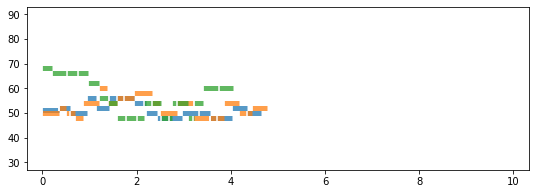

AUDIO PLAYBACK


In [12]:
# set orchestra behavior
voyager.setphrasebehavior('manual', **orchestra_parameters)

# generate response
voyager.respond()

print("ORCHESTRA PLOT")
voyager.plot_response()
print("AUDIO PLAYBACK")
voyager.play_response()

**Note:** the same parameters produce *unique responses* every time! Try it again...

## Responses
Voyager responses to human input, selecting from a number of different "phrase behaviors."

### 1.) Ignore
Ignore human input and generate a random response.

Feature,Listener,,Orchestra
Pitch Center:,56.00,-->,90.00
Pitch Range:,48.00,-->,6.00
Step Size:,3.47,-->,10.00
Contour:,-0.18,-->,0.72
Microtonal:,0.16,-->,0.78
Pulse:,323.00,-->,98.71
Rhythm:,0.02,-->,0.35
Num Notes:,77.00,-->,64.00


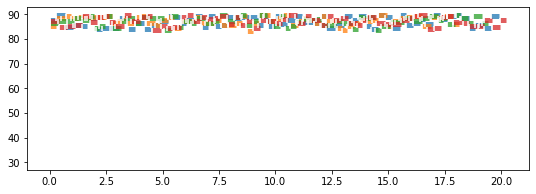

In [13]:
# set orchestra to ignore behavior
voyager.setphrasebehavior('ignore')

# generate response
voyager.respond()

# display response
voyager.print_response()
voyager.plot_response()
voyager.play_response()

### 2.) Imitate
The **listener** *analysis features* are used to set similar **orchestra** *player parameteres*.

Feature,Listener,,Orchestra
Pitch Center:,56.00,-->,56.00
Pitch Range:,48.00,-->,48.00
Step Size:,3.47,-->,3.47
Contour:,-0.18,-->,-0.18
Microtonal:,0.16,-->,0.16
Pulse:,323.00,-->,323.00
Rhythm:,0.02,-->,0.02
Num Notes:,77.00,-->,77.00


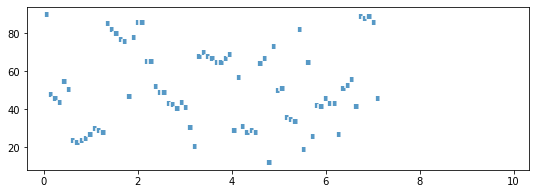

In [14]:
# set orchestra to imitate behavior
voyager.setphrasebehavior('imitate', pgm=1, num_players=1)

# generate response
voyager.respond()

# display response
voyager.print_response()
voyager.plot_response()
voyager.play_response()

### 3.) Oppose
The **listener** *analysis features* are used to set opposing  **orchestra** *player parameteres*.

Feature,Listener,,Orchestra
Pitch Center:,56.00,-->,86.00
Pitch Range:,48.00,-->,24.00
Step Size:,3.47,-->,9.47
Contour:,-0.18,-->,0.18
Microtonal:,0.16,-->,0.66
Pulse:,323.00,-->,77.00
Rhythm:,0.02,-->,0.52
Num Notes:,77.00,-->,44.00


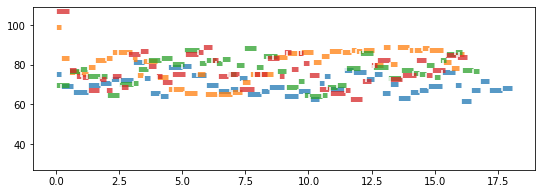

In [16]:
# set orchestra to oppose behavior
voyager.setphrasebehavior('oppose', pgm=1)

# generate response
voyager.respond()

# display response
voyager.print_response()
voyager.plot_response()
voyager.play_response()